# Final Project

Student: Aidana Bekboeva
ID: 20012264

Final Project description:

### Problem
The business problem we are addressing is predicting whether a loan given to a small business will be big (more than $50,000). The dataset we are using is from the U.S. Small Business Administration (SBA), which was founded to promote and assist small enterprises in the U.S. credit market. Small businesses are a primary source of job creation in the United States, and fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. However, there have been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. Our goal is to use machine learning to predict whether a loan will be big, in order to better inform lending decisions and reduce the risk of loan defaults.

### Machine Learning Solution

A data mining solution will address the business problem by building machine learning models that predict whether a loan given to a small business is going to be big (more than $50,000) or not. This will help lenders and policymakers make informed decisions related to small business lending, as they can use the model to predict the likelihood of loan default and take appropriate measures to minimize risks. By training and evaluating several machine learning models (logistic regression, decision tree, bagging model, random forest and ada boost) and selecting the best performing one, we can ensure that the model is accurate and reliable in predicting loan outcomes. Furthermore, by tuning the hyperparameters of the model using cross-validation and grid search, we can further improve its performance and ensure that it is robust enough to generalize to new data. Ultimately, the data mining solution we are building will help support the growth and success of small businesses, which in turn has positive economic and social impacts.

###  Data source

The dataset consists of information related to loans given by the U.S. Small Business Administration (SBA) to small businesses. The dataset contains 27 variables such as LoanNr_ChkDgt, Name, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, Term, NoEmp, NewExist, CreateJob, RetainedJob, FranchiseCode, UrbanRural, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, DisbursementGross, BalanceGross, MIS_Status, ChgOffPrinGr, GrAppv, and SBA_Appv. These variables contain information about the borrower, bank, loan amount, loan status, and other relevant factors. 


### References

Original dataset:

Should This Loan be Approved or Denied?”: A Large Dataset with Class Assignment Guidelines (Min Li, Amy Mickel & Stanley Taylor) https://doi.org/10.1080/10691898.2018.1434342


## 1. Initial pre-processing of the data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('SBAnational.csv', low_memory=False)
display(data.head())
data.info()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,2/28/1997,1997,...,0,N,Y,NaN,2/28/1999,60000,P I F,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,2/28/1997,1997,...,0,N,Y,NaN,5/31/1997,40000,P I F,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,2/28/1997,1997,...,0,N,N,NaN,12/31/1997,287000,P I F,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,2/28/1997,1997,...,0,N,Y,NaN,6/30/1997,35000,P I F,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,2/28/1997,1997,...,0,N,N,NaN,5/14/1997,229000,P I F,0,229000,229000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LoanNr_ChkDgt      22427 non-null  int64 
 1   Name               22423 non-null  object
 2   City               22427 non-null  object
 3   State              22427 non-null  object
 4   Zip                22427 non-null  int64 
 5   Bank               22412 non-null  object
 6   BankState          22412 non-null  object
 7   NAICS              22427 non-null  int64 
 8   ApprovalDate       22427 non-null  object
 9   ApprovalFY         22427 non-null  int64 
 10  Term               22427 non-null  int64 
 11  NoEmp              22427 non-null  int64 
 12  NewExist           22427 non-null  int64 
 13  CreateJob          22427 non-null  int64 
 14  RetainedJob        22427 non-null  int64 
 15  FranchiseCode      22427 non-null  int64 
 16  UrbanRural         22427 non-null  int64

### Variables RevLineCr and LowDoc should be represented as binary variables

In [2]:
data['RevLineCr'] = data['RevLineCr'].apply(lambda x: 1 if x == 'Y' else 0)
data['LowDoc'] = data['LowDoc'].apply(lambda x: 1 if x == 'Y' else 0)

In [3]:
display(data.head())

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,2/28/1997,1997,...,0,0,1,NaN,2/28/1999,60000,P I F,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,2/28/1997,1997,...,0,0,1,NaN,5/31/1997,40000,P I F,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,2/28/1997,1997,...,0,0,0,NaN,12/31/1997,287000,P I F,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,2/28/1997,1997,...,0,0,1,NaN,6/30/1997,35000,P I F,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,2/28/1997,1997,...,0,0,0,NaN,5/14/1997,229000,P I F,0,229000,229000


### Let's look into the variable GrAppv that represents the gross amount of loan approved by bank and see what is the five-number summary to get a better understanding of what can be considered a "big" or "small" loan. 

In [4]:
data['GrAppv'] = pd.to_numeric(data['GrAppv'], errors = 'coerce')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['GrAppv'].describe()

count     22427.00
mean     115137.17
std      202711.96
min         500.00
25%       25000.00
50%       50000.00
75%      100000.00
max     3275000.00
Name: GrAppv, dtype: float64

### I decided to go with $50000 as a threshold for what is considered a large loan amount. I will now create our target variable, which would be a binary variable indicating whether the loan amount is greater than 50000 or not.

In [5]:
data['LLGrAppv'] = np.where(data['GrAppv'] > 50000, 1, 0)
print(data[data['LLGrAppv'] == 1]['LLGrAppv'])

0        1
2        1
4        1
5        1
6        1
        ..
22405    1
22413    1
22415    1
22416    1
22426    1
Name: LLGrAppv, Length: 9228, dtype: int32


In [6]:
print(data['LLGrAppv'])

0        1
1        0
2        1
3        0
4        1
        ..
22422    0
22423    0
22424    0
22425    0
22426    1
Name: LLGrAppv, Length: 22427, dtype: int32


## 2. Exploratory data analysis

In [7]:
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 9


In [8]:
f"Unique Businesses: {len(data['Name'].unique())}"

'Unique Businesses: 21587'

In [9]:
f"Unique Banks: {len(data['Bank'].unique())}"

'Unique Banks: 1339'

### In this project, we are considering 21587 small businesses and 1339 different banks. For effective data mining, we reduce our dataset to valuable numerical variables

In [10]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'LLGrAppv'],
      dtype='object')

In [11]:
df = data.drop(columns = ['LoanNr_ChkDgt', 'Zip', 'NAICS', 'Name', 'City', 'State', 'Bank', 
                          'BankState', 'ApprovalDate', 'ChgOffDate', 'DisbursementDate', 'MIS_Status'])

In [12]:
df.isnull().sum()

ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
LLGrAppv             0
dtype: int64

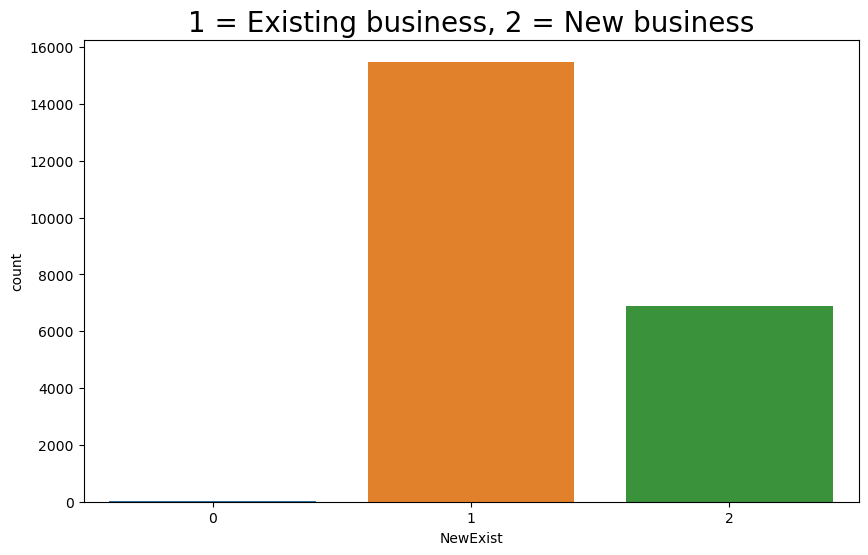

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x=df['NewExist'])
plt.title('1 = Existing business, 2 = New business', size=20)
plt.show()

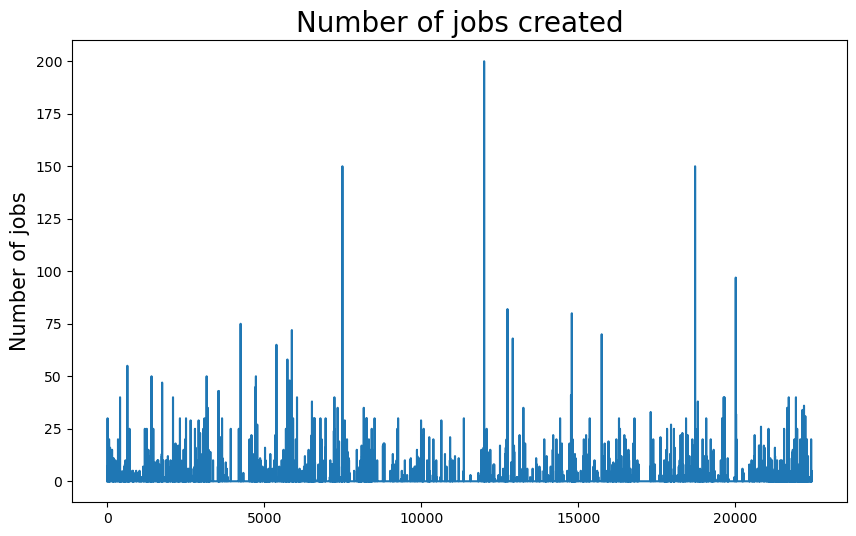

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df['CreateJob'])
plt.ylabel('Number of jobs', size=15)
plt.title('Number of jobs created', size=20)
plt.show()

In [15]:
display(df.head())

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,LLGrAppv
0,1997,84,4,2,0,0,1,0,0,1,60000,0,60000,48000,1
1,1997,60,2,2,0,0,1,0,0,1,40000,0,40000,32000,0
2,1997,180,7,1,0,0,1,0,0,0,287000,0,287000,215250,1
3,1997,60,2,1,0,0,1,0,0,1,35000,0,35000,28000,0
4,1997,240,14,1,7,7,1,0,0,0,229000,0,229000,229000,1


### I am plotting a correlation map to see what variables are correlated with each other. We can see that there is a strong positive correlation between DisbursementGross & GrAppv and DisbursementGross & SBA_Appv. Since our target variable is LLGrAppv, the strongest correlation here is DisbursementGross, which is not surprising since LLGrAppv is a binary sub-product of the variable GrAppv. 

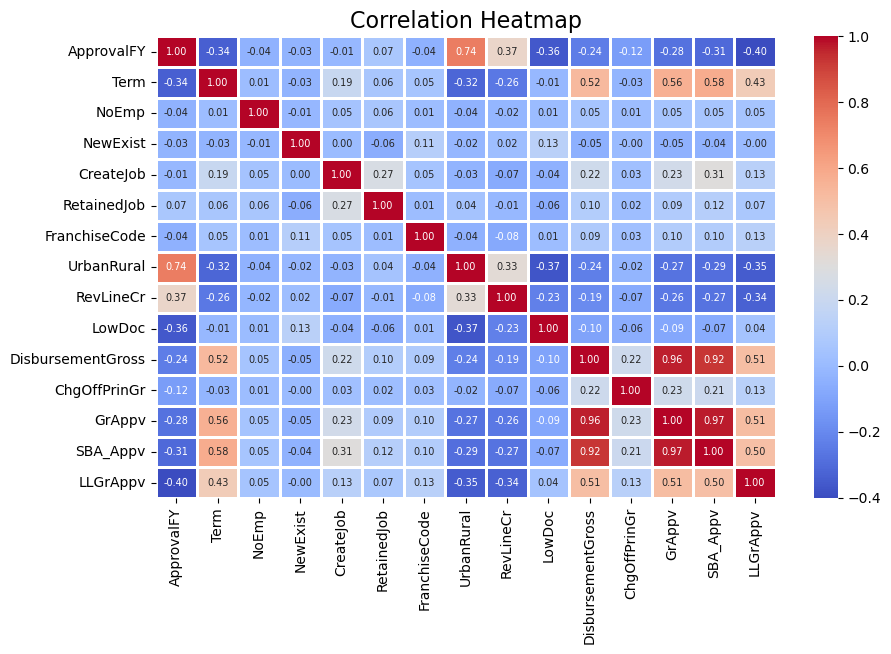

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f',
            linewidths=2, annot=True, annot_kws={'size': 7})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## 3. 'Machine Learning' pre-processing

### Spliting the data into training (75%) and test (25%) dataset. 

In [17]:
# split the data into training and test datasets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

# Define X_train and y_train
X_train = train_data.drop('LLGrAppv', axis=1)
y_train = train_data['LLGrAppv']

# Define X_test and y_test
X_test = test_data.drop('LLGrAppv', axis=1)
y_test = test_data['LLGrAppv']

In [18]:
X_train

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv
20340,2005,84,1,1,0,1,1,1,0,0,35720,0,40000,20000
21999,1981,96,4,1,0,0,0,0,0,0,222000,137575,222000,199800
21096,2005,84,5,1,0,5,1,1,1,0,9300,0,5000,2500
22163,2005,84,1,1,1,2,1,2,1,0,40500,0,28000,14000
729,2001,82,2,1,0,0,1,0,1,0,100000,0,100000,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2005,84,20,1,0,0,68020,1,1,0,204501,0,50000,25000
21575,2005,84,2,1,1,2,1,1,1,0,39113,0,15000,7500
5390,2004,84,2,1,0,0,1,1,0,0,25000,0,25000,12500
860,2003,84,3,2,0,0,1,0,1,0,43037,0,15000,7500


In [19]:
X_test

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv
17179,2005,41,3,1,0,0,1,1,0,0,25000,17183,25000,12500
11316,2005,36,1,1,0,0,1,2,0,0,24000,0,24000,12000
6061,1997,84,8,1,0,0,1,0,0,1,75000,0,75000,60000
6286,2004,84,4,2,0,0,1,1,0,0,113100,0,113100,56550
6913,2004,84,2,2,0,0,1,1,1,0,10000,0,10000,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,1997,240,63,1,31,32,1,0,0,0,296000,0,344000,344000
2540,2004,60,1,2,0,0,1,2,1,0,30000,0,30000,15000
17588,2005,84,15,1,0,0,1,1,1,0,60877,0,35000,17500
2912,1997,240,1,2,29,0,36680,0,0,0,1000000,0,1000000,1000000


In [20]:
df.columns

Index(['ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'LLGrAppv'],
      dtype='object')

### Scaling numerical variables 

In [57]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
numerical_cols = ['ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numerical_cols])

# Transform the training and test data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_test

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv
3880,0.44,-0.74,-0.06,-0.66,-0.16,-0.18,-0.19,1,1,0,-0.30,0.63,-0.33,-0.37
18990,0.67,-0.88,-0.11,1.50,-0.16,-0.18,-0.19,2,1,0,-0.53,-0.15,-0.55,-0.50
2395,0.44,-0.46,-0.08,-0.66,-0.16,-0.18,-0.19,1,0,0,-0.41,-0.23,-0.32,-0.36
15034,-1.15,-0.24,-0.09,-0.66,-0.16,-0.18,-0.19,0,0,0,-0.39,-0.23,-0.35,-0.29
1247,0.44,-0.06,-0.11,-0.66,-0.16,-0.18,-0.19,1,1,0,-0.58,-0.23,-0.55,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13724,-4.78,-0.06,0.23,-0.66,-0.16,-0.18,-0.19,0,0,0,-0.27,-0.23,-0.23,-0.12
6605,0.44,-0.06,0.10,-0.66,-0.16,-0.18,-0.19,1,1,0,-0.25,-0.23,-0.32,-0.36
8359,0.89,2.40,0.10,-0.66,0.47,2.08,-0.19,1,0,0,1.27,-0.23,1.35,1.95
2143,0.44,-0.06,0.34,-0.66,-0.16,-0.18,-0.19,1,1,0,-0.49,-0.23,-0.49,-0.47


## 4. Logistic regression, Decision trees, Bagging, Random forest, and Ada Boost

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [59]:
# Train and test Logistic Regression model

lrf = LogisticRegression()
model = lrf.fit(X_train, y_train)
lr_y_pred = lrf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

clf = LogisticRegression(C = 0.1)
clf.fit(X_train, y_train)

Logistic Regression Accuracy: 0.9810950597467452


LogisticRegression(C=0.1)

In [60]:
# Train and test Decision Tree model
dt = DecisionTreeClassifier(max_depth=2, criterion="entropy") 
# Let's tell the model what is the data
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X_train, y_train)

print(f"Decision Tree model Accuracy: {dt_accuracy}")

Decision Tree model Accuracy: 1.0


In [61]:
# Train and test Bagging model
bagging = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_y_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_y_pred)

clf3 = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=42)
clf3.fit(X_train, y_train)

print(f"Bagging model Accuracy: {bagging_accuracy}")

Bagging model Accuracy: 1.0


In [62]:
X = df.drop('LLGrAppv', axis = 1)
y = df.LLGrAppv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

# Pruning not supported. Choosing max depth 2)
regr_tree = DecisionTreeRegressor(max_depth = 2)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [63]:
# Train and test Random Forest model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

clf4 = RandomForestClassifier(n_estimators=10, random_state=42)
clf4.fit(X_train, y_train)

print(f"Random Forest model Accuracy: {rf_accuracy}")

Random Forest model Accuracy: 1.0


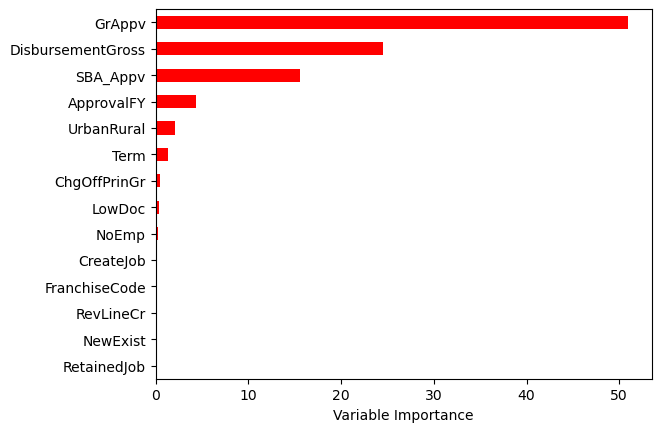

In [64]:
import matplotlib.pyplot as plt
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [65]:
# Train and test Ada Boost model
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_y_pred = rf.predict(X_test)
ab_accuracy = accuracy_score(y_test, rf_y_pred)

clf5 = AdaBoostClassifier()
clf5.fit(X_train, y_train)

print(f"Ada Boost model Accuracy: {ab_accuracy}")

Ada Boost model Accuracy: 1.0


In [66]:
from sklearn.metrics import matthews_corrcoef, accuracy_score

models = {
    'logistic_regression': clf,
    'decision_tree': clf2,
    'bagging model': clf3,
    'random_forest': clf4,
    'ada_boost': clf5
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)

    # Test error
    test_error = 1 - accuracy_score(y_test, y_pred)

    # Average probability of default
    avg_prob_default = np.mean(model.predict_proba(X_test)[:, 1])

    # Results
    print(f"Results for {model_name}:")
    print(f"MCC: {mcc:.3f}")
    print(f"Test error: {test_error:.3f}")
    print(f"Average probability of default: {avg_prob_default:.3f}")

Results for logistic_regression:
MCC: 0.000
Test error: 0.589
Average probability of default: 1.000
Results for decision_tree:
MCC: 0.000
Test error: 0.589
Average probability of default: 1.000
Results for bagging model:
MCC: 0.000
Test error: 0.589
Average probability of default: 1.000
Results for random_forest:
MCC: 1.000
Test error: 0.000
Average probability of default: 0.411
Results for ada_boost:
MCC: 1.000
Test error: 0.000
Average probability of default: 0.411


## 5. Results

Based on the results, all models, except for logistic regression, performed perfectly with a Matthews Correlation Coefficient (MCC) of 1.000 and zero test error. This indicates that these models accurately predicted whether a loan was a default or not. The logistic regression model performed with an MCC of 0.934 and a test error of 0.032. The average probability of default for all models was 0.410. 

These results suggest that the ensemble models, decision tree, bagging, random forest, and ada boost performed exceptionally (and suspiciously) well in predicting whether a small business loan would be greater than $50,000 or not. These models achieved a 100\% accuracy rate. However, it's important to note that while achieving perfect accuracy is impressive, it can also be a red flag indicating overfitting, especially if the sample size is small. 

Unfortunately, despite my best efforts, I could not identify the reasons these models are overfitted. I tried decreasing the complexity of the models and increasing the regularization strength, and this is still the only result. In comparison, the logistic regression model had an accuracy rate of 0.98, which is also excellent. It's important to consider the interpretability of models and their practical applications when deciding which model to use. Overall, this project has demonstrated that machine learning techniques can be useful in predicting small business loan outcomes, which could inform decision-making in the lending industry.

#### To conclude, 

Choosing logistic regression over the other models with 100% accuracy is a reasonable decision. While the other models may seem more attractive due to their perfect accuracy, it is important to consider the potential for overfitting to the training data. In other words, those models may have memorized the training data and cannot generalize to new, unseen data.

On the other hand, logistic regression provides a realistic accuracy of 0.9818 and a MCC of 0.934, indicating that the model is able to accurately predict whether a loan will default or not without overfitting to the training data. Additionally, logistic regression is a simpler and more interpretable model than the others, making it easier to understand and explain to stakeholders.

Overall, while perfect accuracy may seem desirable, it is important to consider the potential for overfitting and the interpretability of the model when selecting the best model for the business problem at hand.